In [125]:
import pandas as pd
import matplotlib.pyplot as plt

In [126]:
# read in CSV
df = pd.read_csv("QB_Data/QBStats_2019.csv")

In [155]:
df_starters = df[df.Att>200]
df_starters.head()

,Rk,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,...,Y/G,Rate,QBR,Sk,Yds.1,NY/A,ANY/A,Sk%,4QC,GWD
0,1,Jared Goff\GoffJa00,LAR,25,QB,16,16,9-7-0,394,626,...,289.9,86.5,48.2,22,170,6.90,6.46,3.4,1.0,2.0
1,2,Jameis Winston\WinsJa00,TAM,25,QB,16,16,7-9-0,380,626,...,319.3,84.3,57.1,47,282,7.17,6.15,7.0,2.0,2.0
2,3,Matt Ryan\RyanMa00,ATL,34,QB,15,15,7-8-0,408,616,...,297.7,92.1,58.4,48,316,6.25,6.08,7.2,3.0,2.0
3,4,Tom Brady\BradTo00,NWE,42,QB,16,16,12-4-0,373,613,...,253.6,88.0,52.5,27,185,6.05,6.24,4.2,1.0,1.0
4,5,Carson Wentz\WentCa00,PHI,27,QB,16,16,9-7-0,388,607,...,252.4,93.1,62.9,37,230,5.91,6.26,5.7,2.0,4.0


In [156]:
df_small = df_starters.drop(['Tm', 'Pos', 'Rate', 'QBR', 'Yds.1', 'NY/A', 'ANY/A'], axis=1)
df_small.head()

,Rk,Player,Age,G,GS,QBrec,Cmp,Att,Cmp%,Yds,...,1D,Lng,Y/A,AY/A,Y/C,Y/G,Sk,Sk%,4QC,GWD
0,1,Jared Goff\GoffJa00,25,16,16,9-7-0,394,626,62.9,4638,...,220,66,7.4,7.0,11.8,289.9,22,3.4,1.0,2.0
1,2,Jameis Winston\WinsJa00,25,16,16,7-9-0,380,626,60.7,5109,...,243,71,8.2,7.1,13.4,319.3,47,7.0,2.0,2.0
2,3,Matt Ryan\RyanMa00,34,15,15,7-8-0,408,616,66.2,4466,...,228,93,7.3,7.1,10.9,297.7,48,7.2,3.0,2.0
3,4,Tom Brady\BradTo00,42,16,16,12-4-0,373,613,60.8,4057,...,193,59,6.6,6.8,10.9,253.6,27,4.2,1.0,1.0
4,5,Carson Wentz\WentCa00,27,16,16,9-7-0,388,607,63.9,4039,...,213,53,6.7,7.0,10.4,252.4,37,5.7,2.0,4.0


In [157]:
df_smaller = df_small.drop(['1D', 'Lng', 'AY/A', 'Y/C', 'Y/G', 'Sk%', '4QC', 'GWD'], axis = 1)
df_smaller.head()

,Rk,Player,Age,G,GS,QBrec,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%,Y/A,Sk
0,1,Jared Goff\GoffJa00,25,16,16,9-7-0,394,626,62.9,4638,22,3.5,16,2.6,7.4,22
1,2,Jameis Winston\WinsJa00,25,16,16,7-9-0,380,626,60.7,5109,33,5.3,30,4.8,8.2,47
2,3,Matt Ryan\RyanMa00,34,15,15,7-8-0,408,616,66.2,4466,26,4.2,14,2.3,7.3,48
3,4,Tom Brady\BradTo00,42,16,16,12-4-0,373,613,60.8,4057,24,3.9,8,1.3,6.6,27
4,5,Carson Wentz\WentCa00,27,16,16,9-7-0,388,607,63.9,4039,27,4.4,7,1.2,6.7,37


In [158]:
df_smallest = df_smaller.drop(['G', 'GS', 'TD%', 'Int%'], axis = 1)
df_smallest.head()

,Rk,Player,Age,QBrec,Cmp,Att,Cmp%,Yds,TD,Int,Y/A,Sk
0,1,Jared Goff\GoffJa00,25,9-7-0,394,626,62.9,4638,22,16,7.4,22
1,2,Jameis Winston\WinsJa00,25,7-9-0,380,626,60.7,5109,33,30,8.2,47
2,3,Matt Ryan\RyanMa00,34,7-8-0,408,616,66.2,4466,26,14,7.3,48
3,4,Tom Brady\BradTo00,42,12-4-0,373,613,60.8,4057,24,8,6.6,27
4,5,Carson Wentz\WentCa00,27,9-7-0,388,607,63.9,4039,27,7,6.7,37


In [159]:
df_smallest[['Wins','Losses', 'Draws']] = df.QBrec.str.split("-",expand=True) 

In [160]:
df_smallest['Wins'] = df_smallest['Wins'].astype(int)
df_smallest['Losses'] = df_smallest['Losses'].astype(int)
df_smallest['Draws'] = df_smallest['Draws'].astype(int)

In [161]:
df_smallest['Win%'] = df_smallest.Wins/(df_smallest.Wins + df_smallest.Losses + df_smallest.Draws)

In [162]:
df_smallest.head()

,Rk,Player,Age,QBrec,Cmp,Att,Cmp%,Yds,TD,Int,Y/A,Sk,Wins,Losses,Draws,Win%
0,1,Jared Goff\GoffJa00,25,9-7-0,394,626,62.9,4638,22,16,7.4,22,9,7,0,0.562500
1,2,Jameis Winston\WinsJa00,25,7-9-0,380,626,60.7,5109,33,30,8.2,47,7,9,0,0.437500
2,3,Matt Ryan\RyanMa00,34,7-8-0,408,616,66.2,4466,26,14,7.3,48,7,8,0,0.466667
3,4,Tom Brady\BradTo00,42,12-4-0,373,613,60.8,4057,24,8,6.6,27,12,4,0,0.750000
4,5,Carson Wentz\WentCa00,27,9-7-0,388,607,63.9,4039,27,7,6.7,37,9,7,0,0.562500


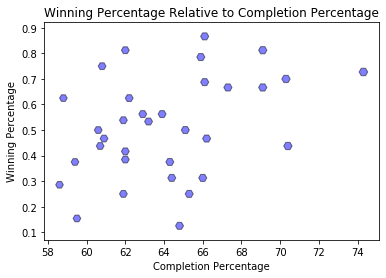

In [165]:
x = df_smallest['Cmp%']
y = df_smallest['Win%']
plt.scatter(x, y, marker="H", facecolors="blue", edgecolors="black",
            s=x, alpha=0.5)
plt.title("Winning Percentage Relative to Completion Percentage")
plt.xlabel("Completion Percentage")
plt.ylabel("Winning Percentage")
plt.savefig("Images/2019cmp.png")

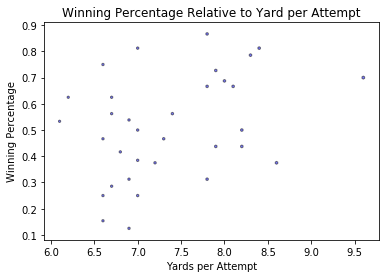

In [166]:
x2 = df_smallest['Y/A']
y2 = df_smallest['Win%']
plt.scatter(x2, y2, marker="h", facecolors="blue", edgecolors="black",
            s=x2, alpha=0.5)
plt.title("Winning Percentage Relative to Yard per Attempt")
plt.xlabel("Yards per Attempt")
plt.ylabel("Winning Percentage")
plt.savefig("Images/2019ypa.png")